In [30]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [31]:
# load the csv file
# store the data in 'df_reimb'
df = pd.read_csv('SAT_Exam.csv')

# display first five observations using head()
df.head()

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157


In [32]:
# use 'shape' to check the dimension of data
df.shape

(96, 5)

Interpretation: The data has 96 observations and 5 variables.

In [33]:
# use 'info()' to understand the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   General_knowledge   96 non-null     int64
 1   Aptitude            96 non-null     int64
 2   Mathematics         96 non-null     int64
 3   Science             96 non-null     int64
 4   SAT                 96 non-null     int64
dtypes: int64(5)
memory usage: 3.9 KB


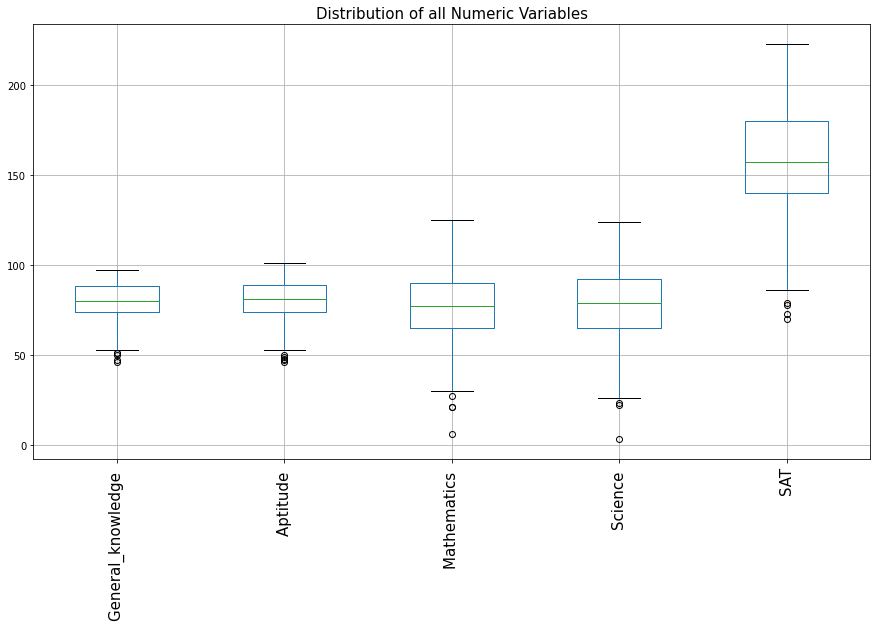

In [34]:
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()


# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [35]:
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df.shape

(89, 5)

In [36]:
# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first
Total = df.isnull().sum().sort_values(ascending=False)          

# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

,Total,Percentage of Missing Values
General_knowledge,0,0.000000
Aptitude,0,0.000000
Mathematics,0,0.000000
Science,0,0.000000
SAT,0,0.000000


4.1 Ordinary Least Square Method (OLS)
The ordinary least square method aims to minimize the sum of the squared difference between the actual and the predicted values. Squaring ensures that each term is positive. It penalizes the model for the negative error terms. This approach calculates the β0 and β1 values that minimize the sum of squared differences along the line of prediction.

In [37]:
x = df.drop('SAT',axis=1)
y = df['SAT']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [43]:
X_test

,General_knowledge,Aptitude,Mathematics,Science
40,81,86,79,76
28,74,71,81,79
63,88,91,61,62
46,79,76,60,62
88,86,83,73,76
78,70,72,86,86
8,87,89,66,66
86,75,75,78,82
61,81,79,83,83
18,88,89,68,68


In [40]:
# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train_slr', X_train.shape)
print('y_train_slr', y_train.shape)

# print dimension of test set
print('X_test_slr', X_test.shape)
print('y_test_slr', y_test.shape)

X_train_slr (62, 4)
y_train_slr (62,)
X_test_slr (27, 4)
y_test_slr (27,)


In [41]:
# convert the X_train to DataFrame
X_train = pd.DataFrame(X_train)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train.head()

,intercept,General_knowledge,Aptitude,Mathematics,Science
29,1.000000,55,54,30,29
22,1.000000,78,83,92,94
77,1.000000,53,53,39,40
67,1.000000,74,74,50,47
73,1.000000,96,94,84,79


In [42]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
SLR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
SLR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1042.
Date:                Wed, 31 May 2023   Prob (F-statistic):           1.47e-52
Time:                        23:35:23   Log-Likelihood:                -154.79
No. Observations:                  62   AIC:                             319.6
Df Residuals:                      57   BIC:                             330.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.7370      3.459     -0.213      0.832      -7.663       6.189
General_knowledge      1.2072      0.122      9.890      0.000       0.963       1.452
Aptitude              -0.1495      0.127     -1.179      0.243      -0.403       0.104
Mathematics           -0.2261      0.123     -1.838      0.071      -0.473       0.020
Science                1.1712      0.119      9.869      0.000       0.934       1.409
==============================================================================
Omnibus:                        8.474   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                2.880
Skew:                           0.104   Prob(JB):                        0.237
Kurtosis:                       1.965   Cond. No.                     1.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
# predict the SAT Score using 'predict()' on training data
y_train_slr_pred = SLR_model.predict(X_train)

# display the first five predicted values 
y_train_slr_pred.head()

29    84.769434
22   170.310084
77    93.352849
67   121.276301
73   174.636261
dtype: float64

Now we have actual and predicted values of the target variable for training dataset (y_train and y_train_pred respectively)

# 4.2 Measures of Variation

Residual: It is calculated as the difference between the actual and predicted value of the dependent variable.

# 4.2.1 Sum of Squared Residuals(SSR)

In [46]:
# calculate the SSR on train dataset
ssr = np.sum((y_train_slr_pred - y_train.mean())**2)
ssr

39147.27308442505

# 4.2.2 Sum of Squared Error (SSE)

it is defined as the sum of the squared difference between the actual value and the predicted value.

In [47]:
# calculate the SSE on train dataset
sse = np.sum((y_train - y_train_slr_pred)**2)
sse

535.1946575103698

# 4.2.3 Sum of Squared Total (SST)

It is the sum of the squared difference between the actual value and the mean of the dependent variable.

In [49]:
# calculate the SST on train dataset
sst = np.sum((y_train - y_train.mean())**2)
sst

39682.467741935485

In [50]:
# add the values of SSE and SSR
sse + ssr

39682.46774193542

Interpretation: From the abve putput, we can verify that SST (Total variation) is the sum of SSR and SSE.

# 4.2.4 Coefficient of Determination (R-Squared)¶

The coefficient of determination explains the percentage of variation in the dependent variable that the independent variables explain collectively.

In [51]:
# calculate R-Squared on train dataset
# use 'rsquared' method from statsmodel
r_sq = SLR_model.rsquared

# print the R-squared value
r_sq

0.9865130701802401

Now, we can also calculate the R-squared value using the formula (SSR/SST).

In [52]:
# calculate R-Squared on train dataset using the formula
r_sq = ssr/sst

# print the R-squared value
r_sq

0.9865130701802384

Interpretation: From the above output we can conclude that our model explains 98.6% variation in the Total_Reimbursement. We can also obtain this value from the summary of the model.

# 4.2.5 Standard Error of Estimate (SEE)

The SEE is the measure of the variability of actual values around the prediction line. Smaller the value of SEE better is the model.

In [67]:
# compute SEE using the below formula 
# see =  np.sqrt(sse/(len(train_data) - k))    

# for SLR take k = 2, as there are two coefficients (parameters) in the model
see = np.sqrt(sse/(len(X_train) - 4))    
see

3.0376790638588496

Let us visualize the variability around the predicted line using regression plot.Let us visualize the variability around the predicted line using regression plot.



In [68]:
pred_df=pd.DataFrame({'Actual Value':y_train,'Predicted Value':y_train_slr_pred,'Difference':y_train-y_train_slr_pred})
print(pred_df)

    Actual Value  Predicted Value  Difference
29            86        84.769434    1.230566
22           176       170.310084    5.689916
77            95        93.352849    1.647151
67           121       121.276301   -0.276301
73           171       174.636261   -3.636261
58           148       150.771711   -2.771711
33           147       150.214825   -3.214825
62           143       143.816605   -0.816605
26           191       187.331422    3.668578
92           191       188.508203    2.491797
36           186       184.914430    1.085570
72           158       160.326514   -2.326514
95           180       177.254113    2.745887
19           180       182.176428   -2.176428
80           199       196.519398    2.480602
45           159       158.766146    0.233854
82           153       148.948203    4.051797
17           168       168.592541   -0.592541
56           190       191.878479   -1.878479
59           137       138.519647   -1.519647
20           136       132.771017 

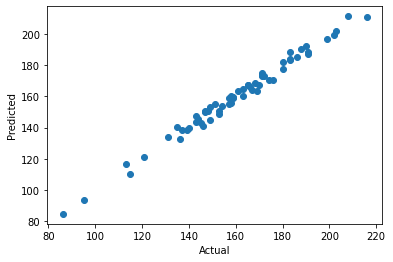

In [70]:
plt.scatter(y_train,y_train_slr_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

We can see there is no difference in the actual and predicted.

<AxesSubplot:xlabel='SAT'>

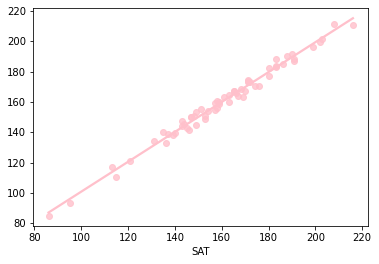

In [71]:
sns.regplot(x=y_train,y=y_train_slr_pred,ci=None,color ='pink')

Interpretation: The pink line in the plot, indicates the regression line for the data. We can observe that most of the data points lie on (or near) the line. Also, some of the points are away from the line, which concludes the variation of the data to the fitted line.

# 4.3 Inferences about Slope and Intercept¶

Let us print the summary of the regression model (built in section 4.1).

In [72]:
# print the model summary
print(SLR_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    SAT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1042.
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.47e-52
Time:                        00:19:30   Log-Likelihood:                -154.79
No. Observations:                  62   AIC:                             319.6
Df Residuals:                      57   BIC:                             330.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercept             -0.7370      3

# 4.3.2 The t-test for Slope and Intercept¶

The coefficient of regression captures the presence of a linear relationship between the independent and dependent variables. If the coefficient value is zero, we can infer that there is no linear relationship between the two variables which is statistically important. It is calculated as:
<p style='text-indent:28em'> <strong> t_value = coefficient / Standard_error </strong>  </p>

The test hypothesis for the t-test is given as:
<p style='text-indent:35em'> <strong> H<sub>o</sub>: β<sub>1</sub> = 0 </strong> </p>
<p style='text-indent:35em'> <strong> H<sub>1</sub>: β<sub>1</sub> ≠ 0 </strong> </p>
                                    
Now, let us see how to calculate the t_test value for slope and intercept.

In [74]:
# perform t_test for intercept
# 'params[0]' returns the value of intercept 
# 'bse[0]' returns the standard error of intercept
t_intercept = SLR_model.params[0] / SLR_model.bse[0]

# print the value of t-statistic
t_intercept

-0.21307093065768637

In [75]:
# t_test for slope
# 'params[1]' returns the value of slope
# 'bse[1]' returns the standard error of slope
t_slope = SLR_model.params[1] / SLR_model.bse[1]

# print the value of t-statistic
t_slope

9.890084800731923

Now, let us see how to calculate the p-value associated with t_test value for slope and intercept.

In [76]:
# calculate p-value for intercept
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for intercept
# degrees of freedom = n - 1 = 62 - 1 = 61
pval = stats.t.sf(np.abs(t_intercept), 61)*2 
pval

0.8319821313945737

In [77]:
# calculate p-value for slope
# use 'sf' (Survival function) from t-distribution to calculate the corresponding p-value

# pass degrees of freedom and t-statistic value for slope
# degrees of freedom = n - 1 = 62 - 1 = 61
pval = stats.t.sf(np.abs(t_slope), 61)*2 
pval

2.716495695311877e-14